In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
import re
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

/home/kuba/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
np.set_printoptions(suppress=True, precision=5)

In [3]:
KatalogPickli="Pickle"
outDir="../src/OutDir"

In [28]:
with open(os.path.join(KatalogPickli, "Ecola-wygladzone-ustandaryzowane.pickle"), "rb") as plik:
    szeregi=pickle.load(plik)
with open(os.path.join(outDir, "odl-1627766016.7739563-gamma-1.0.pickle"), "rb") as plik:
    odl=pickle.load(plik)
with open(os.path.join(outDir, "odl-Ecola-wygladzone-ustandaryzowane.pickle1627817822.0182662dtw.pickle"), "rb") as plik:
    odlDtw=pickle.load(plik)

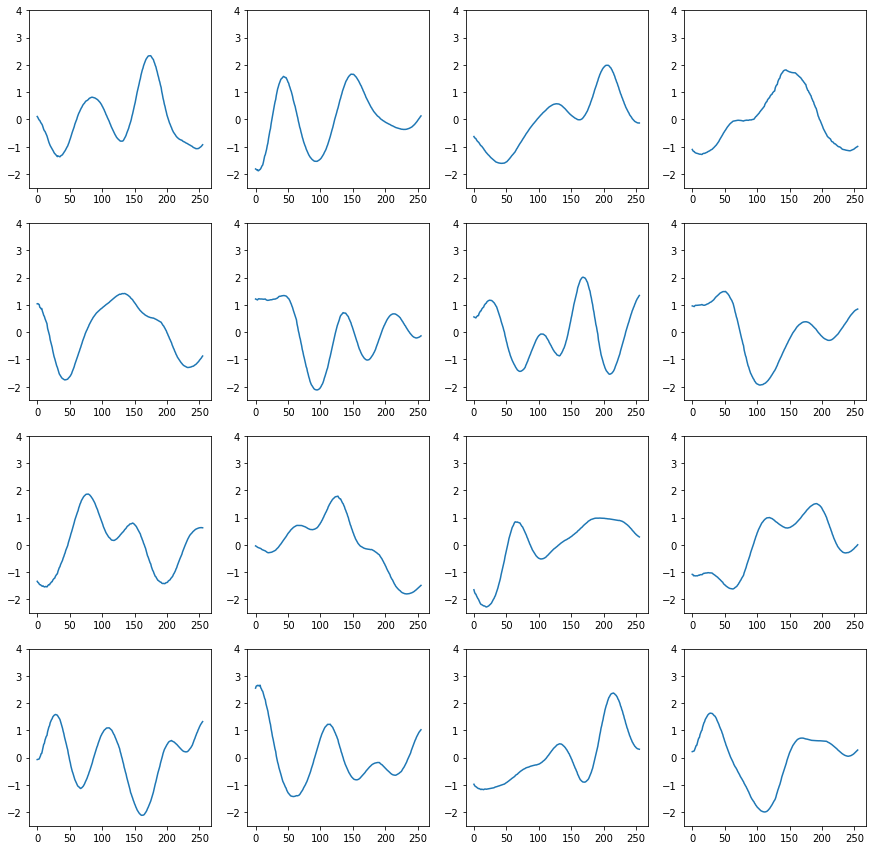

In [29]:
plt.gcf().set_size_inches(15,15)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.ylim(-2.5, 4)
    #plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregi[i,:])

# Softdtw

### Wykres silhouette

In [30]:
reExpr=re.compile(r".*1\.0\.pickle")
reExprOdl=re.compile(r".*odl.*")

In [31]:
listaPasujacych=[]
for plik in os.listdir("../src/OutDir"):
    if reExpr.match(plik) is not None and reExprOdl.match(plik) is None:
        listaPasujacych.append(plik)

In [32]:
listaPasujacych

['1627413516.0541492-n_cluster-3-gamma-1.0.pickle',
 '1627412797.5835302-n_cluster-2-gamma-1.0.pickle',
 '1627414763.826145-n_cluster-5-gamma-1.0.pickle',
 '1627414955.463535-n_cluster-7-gamma-1.0.pickle',
 '1627412887.452897-n_cluster-4-gamma-1.0.pickle',
 '1627414132.2606325-n_cluster-6-gamma-1.0.pickle']

In [8]:
listaSilhouetteScore=[None for i in range(6)]
for plik in listaPasujacych:
    with open(os.path.join("../src/OutDir/",plik), "rb") as file:
        model=pickle.load(file)
    etykiety=model.predict(szeregi)
    ocena=silhouette_score(odl, etykiety, metric="precomputed")
    listaSilhouetteScore[model.n_clusters-2]=ocena

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dime

In [9]:
listaSilhouetteScore

[0.2589531174234146,
 0.24284841308483432,
 0.20328883732967282,
 0.18463037691366355,
 0.17715644216397133,
 0.1724094562521315]

In [10]:
plt.plot(range(2,8), listaSilhouetteScore)

In [33]:
listaSilhouetteScoreDtw=[None for i in range(6)]
for plik in listaPasujacych:
    with open(os.path.join("../src/OutDir/",plik), "rb") as file:
        model=pickle.load(file)
    etykiety=model.predict(szeregi)
    ocena=silhouette_score(odlDtw, etykiety, metric="precomputed")
    listaSilhouetteScoreDtw[model.n_clusters-2]=ocena

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dime

In [34]:
listaSilhouetteScoreDtw

[0.1947325102596326,
 0.18471015537018168,
 0.14181305510044181,
 0.12309627925305036,
 0.12084305727505056,
 0.1132450318060573]

In [11]:
reExpr=re.compile(r".*1\.0randomInit\.pickle")
listaPasujacych=[]
for plik in os.listdir("../src/OutDir"):
    if reExpr.match(plik) is not None and reExprOdl.match(plik) is None:
        listaPasujacych.append(plik)

In [12]:
listaPasujacych

['1627749675.5457642-n_cluster-6-gamma-1.0randomInit.pickle',
 '1627749795.770643-n_cluster-6-gamma-1.0randomInit.pickle',
 '1627749742.9079435-n_cluster-6-gamma-1.0randomInit.pickle',
 '1627749654.76288-n_cluster-6-gamma-1.0randomInit.pickle',
 '1627749599.1900716-n_cluster-6-gamma-1.0randomInit.pickle',
 '1627749183.5338836-n_cluster-6-gamma-1.0randomInit.pickle',
 '1627749851.5628486-n_cluster-6-gamma-1.0randomInit.pickle',
 '1627749808.209826-n_cluster-6-gamma-1.0randomInit.pickle',
 '1627749473.5460038-n_cluster-6-gamma-1.0randomInit.pickle',
 '1627748356.9236665-n_cluster-6-gamma-1.0randomInit.pickle']

In [13]:
listaSilhouetteScore=[]
for plik in listaPasujacych:
    with open(os.path.join("../src/OutDir/",plik), "rb") as file:
        model=pickle.load(file)
    etykiety=model.predict(szeregi)
    ocena=silhouette_score(odl, etykiety, metric="precomputed")
    listaSilhouetteScore.append(ocena)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dime

In [14]:
listaSilhouetteScore

[0.17779453609156057,
 0.17048421211917997,
 0.1617268819911903,
 0.17286299209755743,
 0.17608615930792482,
 0.1783553129397295,
 0.17511169298010243,
 0.17070196931475135,
 0.1717128173736445,
 0.1878546703716772]

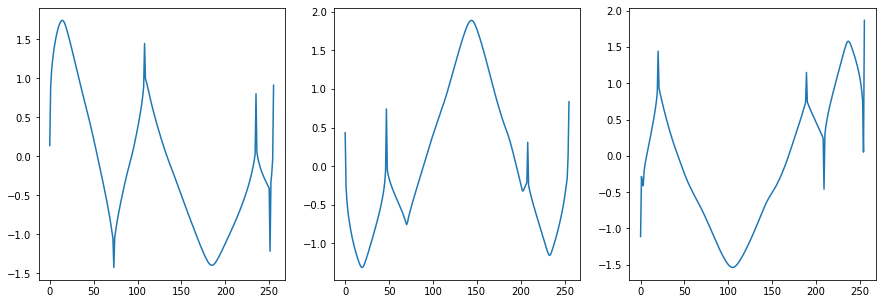

In [20]:
with open(os.path.join("../src/OutDir/",'1627413516.0541492-n_cluster-3-gamma-1.0.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,5)
for i in range(3):
    plt.subplot(1,3,i+1)
    #plt.ylim(0.015, 0.030)
    plt.plot(model.cluster_centers_[i].ravel())

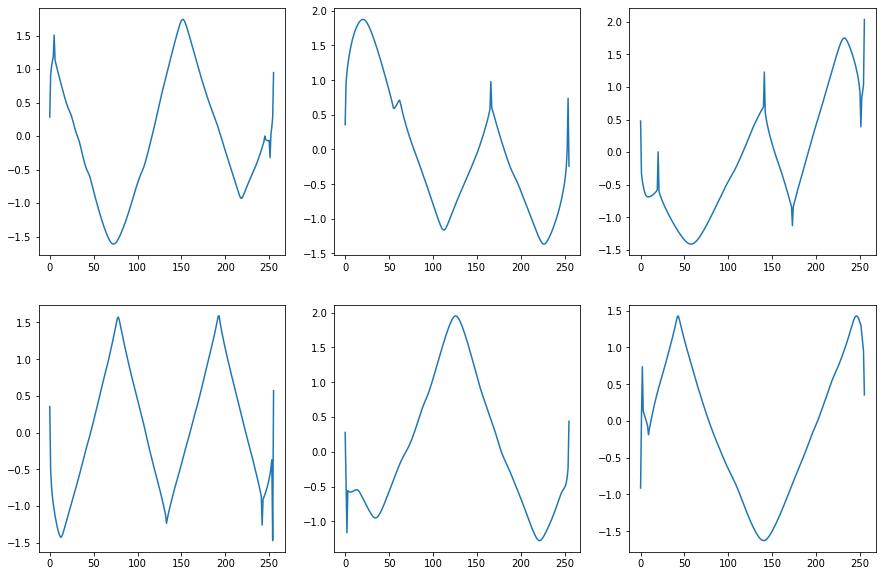

In [16]:
with open(os.path.join("../src/OutDir/",'1627414132.2606325-n_cluster-6-gamma-1.0.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,10)
for i in range(6):
    plt.subplot(2,3,i+1)
    #plt.ylim(0.015, 0.035)
    plt.plot(model.cluster_centers_[i].ravel())

In [18]:
with open(os.path.join("../src/OutDir/",'1627748356.9236665-n_cluster-6-gamma-1.0randomInit.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,10)
for i in range(6):
    plt.subplot(2,3,i+1)
    #plt.ylim(0.015, 0.035)
    plt.plot(model.cluster_centers_[i].ravel())

In [19]:
etykiety=model.predict(szeregi)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [20]:
np.unique(etykiety, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([664, 639, 695, 592, 863, 628]))

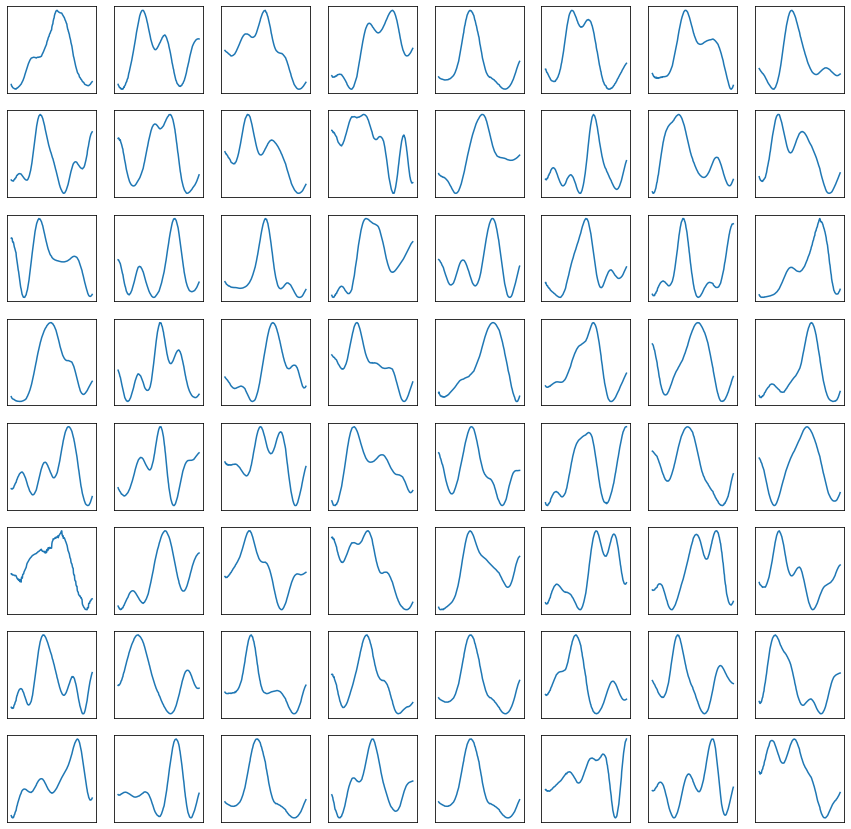

In [25]:
k=4
plt.gcf().set_size_inches(15,15)
szeregiWKtejGrupie=szeregi[etykiety==k,:]
for i in range(64):
    plt.subplot(8,8,i+1)
    #plt.ylim(0.005, 0.045)
    plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregiWKtejGrupie[i])

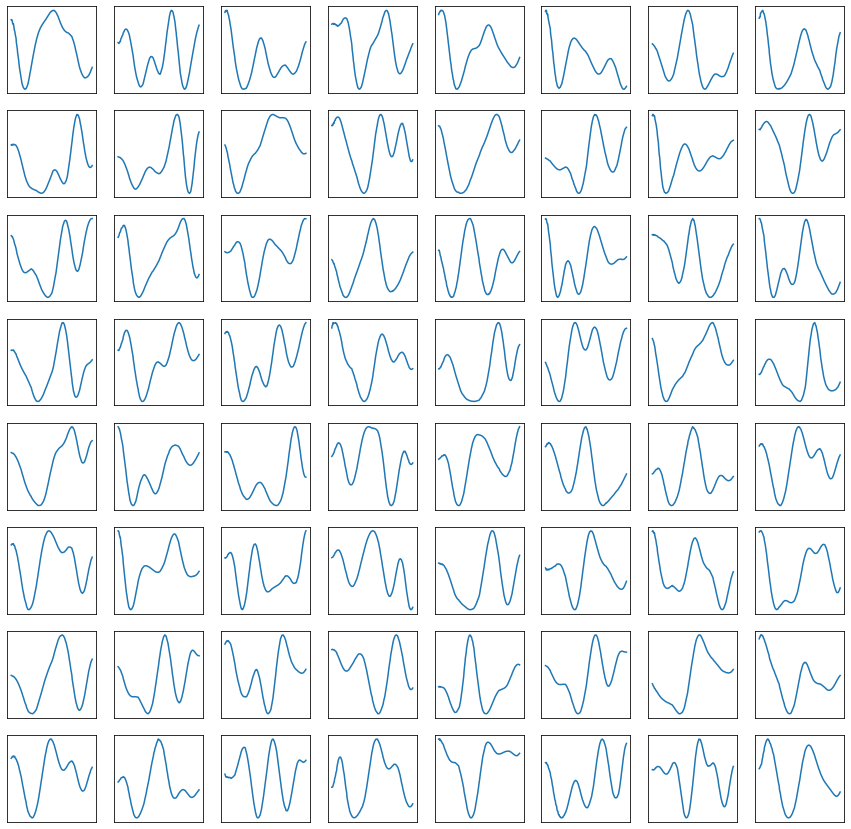

In [26]:
k=0
plt.gcf().set_size_inches(15,15)
szeregiWKtejGrupie=szeregi[etykiety==k,:]
for i in range(64):
    plt.subplot(8,8,i+1)
    #plt.ylim(0.005, 0.045)
    plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregiWKtejGrupie[i])

### KMeans 

In [15]:
kmeansSilList=[]
for i in range(2,8):
    kmeans=KMeans(i)
    predictKMeans=kmeans.fit_predict(szeregi)
    ocena=silhouette_score(odl, predictKMeans, metric="precomputed")
    kmeansSilList.append(ocena)
kmeansSilList

[0.2685882090017218,
 0.19603051095269974,
 0.1687298839196792,
 0.1327460359425394,
 0.10576863288148014,
 0.10133155852128115]

In [16]:
rozniceSil=np.array(listaSilhouetteScore)-np.array(kmeansSilList)
rozniceSil

array([-0.00973,  0.04591,  0.03432,  0.05158,  0.07309,  0.0723 ])

In [37]:
rozniceSil=np.array(listaSilhouetteScoreDtw)-np.array(kmeansSilList)
rozniceSil

array([-0.07386, -0.01132, -0.02692, -0.00965,  0.01507,  0.01191])

In [45]:
kmeans=KMeans(6)
predictKMeans=kmeans.fit_predict(szeregi)

In [44]:
plt.gcf().set_size_inches(15,5)
for i in range(2):
    plt.subplot(1,3,i+1)
    #plt.ylim(0.015, 0.030)
    plt.plot(kmeans.cluster_centers_[i].ravel())

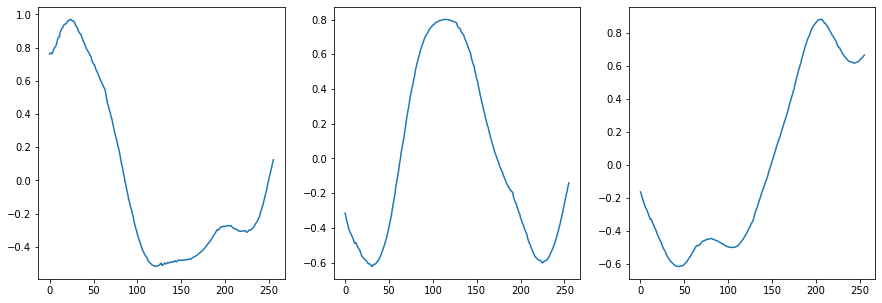

In [30]:
plt.gcf().set_size_inches(15,5)
for i in range(3):
    plt.subplot(1,3,i+1)
    #plt.ylim(0.015, 0.030)
    plt.plot(kmeans.cluster_centers_[i].ravel())

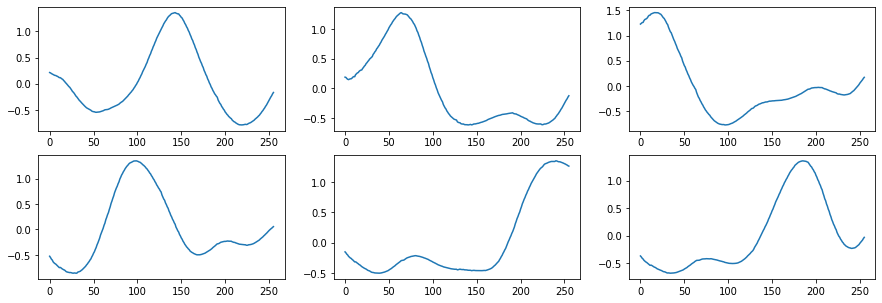

In [46]:
plt.gcf().set_size_inches(15,5)
for i in range(6):
    plt.subplot(2,3,i+1)
    #plt.ylim(0.015, 0.030)
    plt.plot(kmeans.cluster_centers_[i].ravel())

In [32]:
etykiety=kmeans.predict(szeregi)

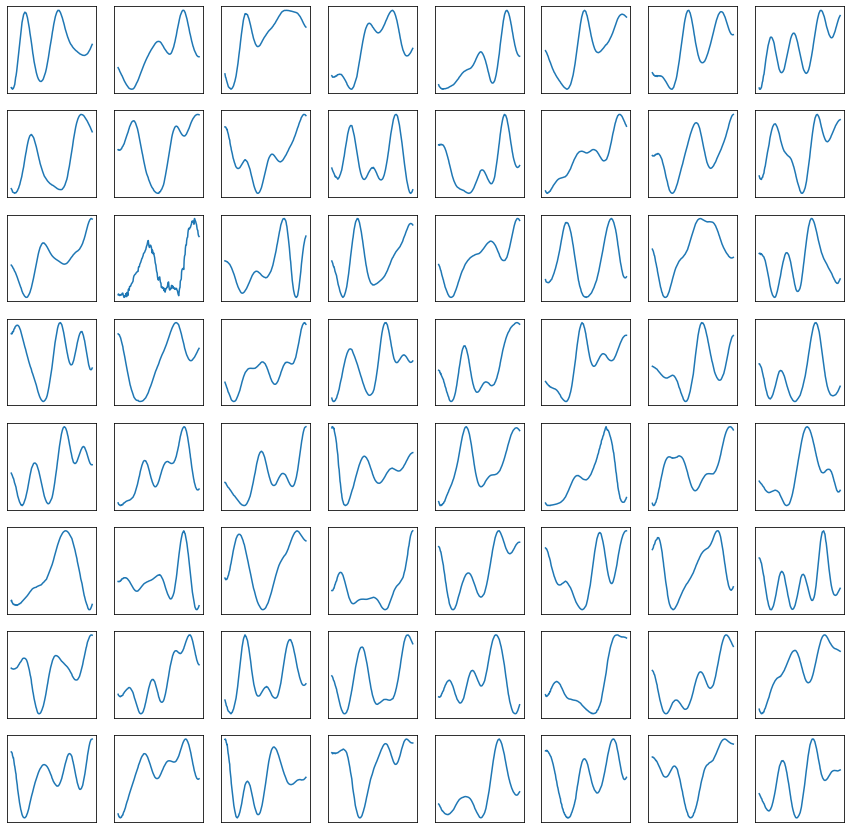

In [36]:
k=2
plt.gcf().set_size_inches(15,15)
szeregiWKtejGrupie=szeregi[etykiety==k,:]
for i in range(64):
    plt.subplot(8,8,i+1)
    #plt.ylim(0.005, 0.045)
    plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregiWKtejGrupie[i])

In [40]:
wystapieniaLiter, bledneNazwy=zrobStatystykeWystapienGrupFunkcjonalnych(kmeans, etykiety, szeregi, szeregiNazwy)

Liczba błędnych nazw: 387


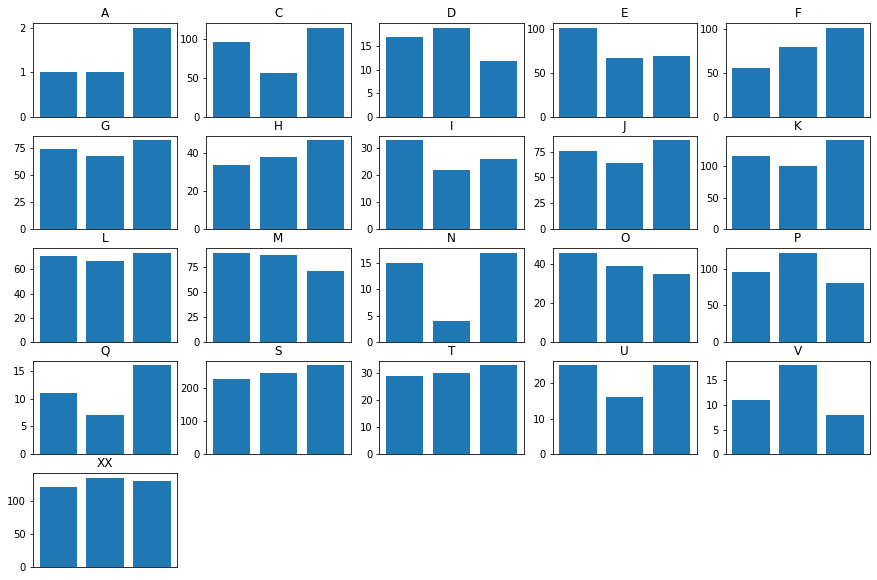

In [41]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety)

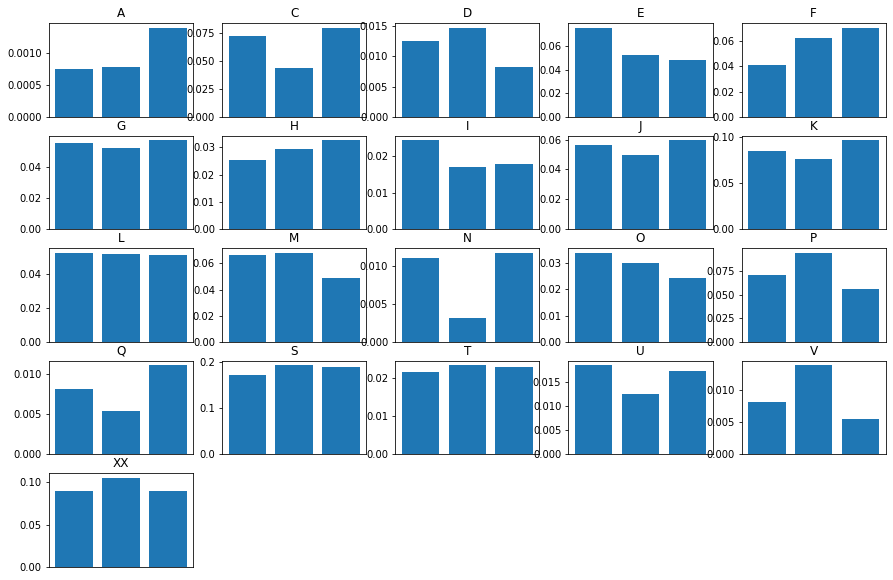

In [42]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety, True)

# Analiza

In [17]:
model.n_clusters

6

In [21]:
with open(os.path.join(outDir,"katalogFunkcjonalnosciGenow.pickle"), "rb") as plik:
    slownikFunGenow=pickle.load(plik)
with open(os.path.join(KatalogPickli,"Ecola-wygladzone-ustandaryzowane.pickle-paths"), "rb") as plik:
    szeregiNazwy=pickle.load(plik)

In [22]:
def zrobStatystykeWystapienGrupFunkcjonalnych(model, etykiety, szeregi, szeregiNazwy):
    wystapieniaLiter={}
    bledneNazwy=[]
    for k in range(model.n_clusters):
        maskaWyboru=(etykiety==k)
        wybraneNazwy=np.array(szeregiNazwy)[maskaWyboru]
        for nazwa in wybraneNazwy:
            if nazwa not in slownikFunGenow:
                bledneNazwy.append(nazwa)
                litera="XX"
            else:
                litera=slownikFunGenow[nazwa]
            if litera not in wystapieniaLiter:
                wystapieniaLiter[litera]=dict([(i,0) for i in range(model.n_clusters)])
            wystapieniaLiter[litera][k]+=1
    print(f"Liczba błędnych nazw: {len(bledneNazwy)}")
    return wystapieniaLiter, bledneNazwy

In [23]:
def rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety, normalizacja=False):
    plt.gcf().set_size_inches(15,10)
    i=0
    L=list(wystapieniaLiter.items())
    L.sort()
    wystapieniaLiter=dict(L)
    czestosc=np.unique(etykiety, return_counts=True)[1]
    for litera in wystapieniaLiter:
        i+=1
        elementy=np.array(list(wystapieniaLiter[litera].items()))
        plt.subplot(5,5,i)
        if normalizacja:
            plt.bar(elementy[:,0], elementy[:,1]/czestosc)
        else:
            plt.bar(elementy[:,0], elementy[:,1])
        plt.title(litera)
        plt.tick_params(axis='both',which='both', bottom=False,top=False, labelbottom=False)
    plt.show()

In [21]:
wystapieniaLiter, bledneNazwy=zrobStatystykeWystapienGrupFunkcjonalnych(model, etykiety, szeregi, szeregiNazwy)

Liczba błędnych nazw: 387


In [22]:
bledneNazwy[0]

'lcl|NC_000913.3_cds_NP_414568.1_27 [gene=lspA] [locus_tag=b0027] [db_xref=UniProtKB/Swiss-Prot:P00804] [protein=lipoprotein signal peptidase] [protein_id=NP_414568.1] [location=25207..25701] [gbkey=CDS]'

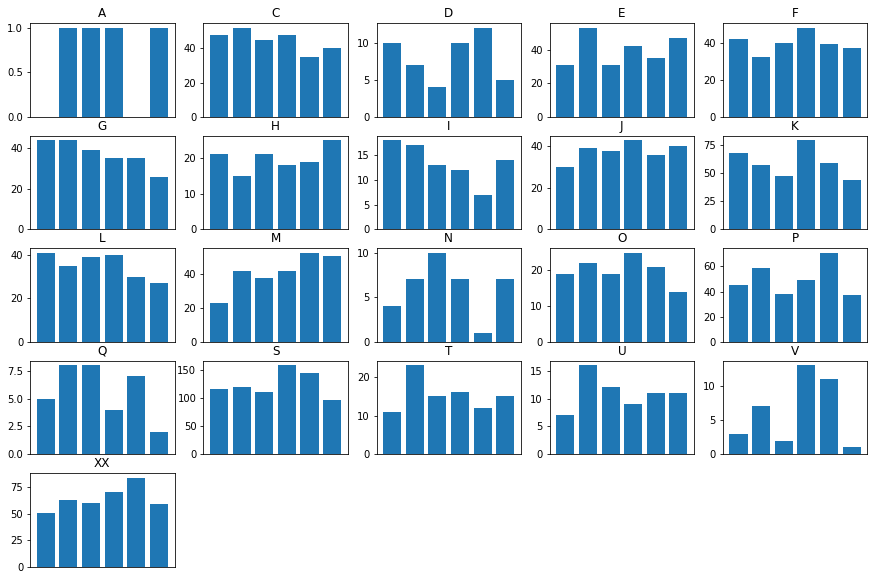

In [23]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety)

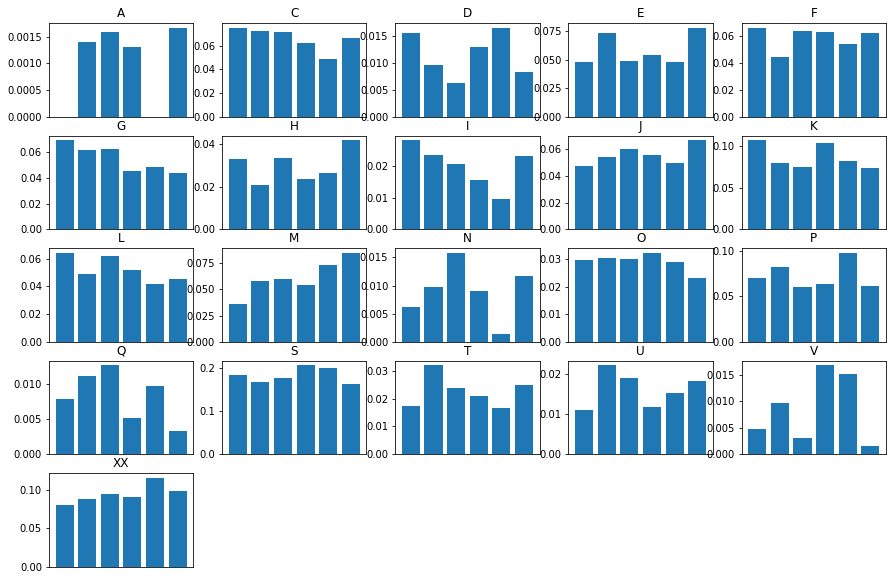

In [24]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety, True)

## 3 grupy

In [75]:
with open(os.path.join("../src/OutDir/",'1627413516.0541492-n_cluster-3-gamma-1.0.pickle'), "rb") as file:
    model=pickle.load(file)

In [76]:
etykiety=model.predict(szeregi)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [83]:
np.unique(etykiety, return_counts=True)

(array([0, 1, 2]), array([1213, 1686, 1182]))

In [80]:
wystapieniaLiter, bledneNazwy=zrobStatystykeWystapienGrupFunkcjonalnych(model, etykiety, szeregi, szeregiNazwy)

Liczba błędnych nazw: 387


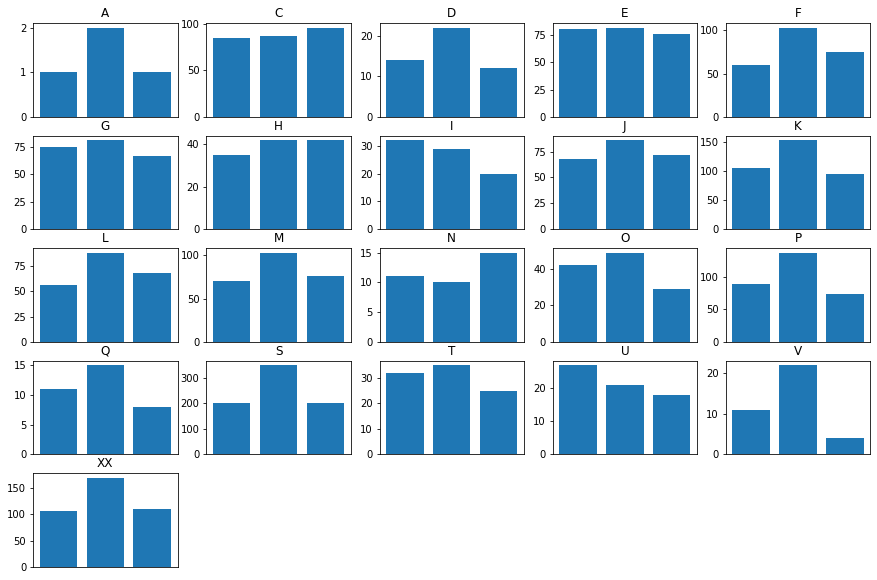

In [82]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety)

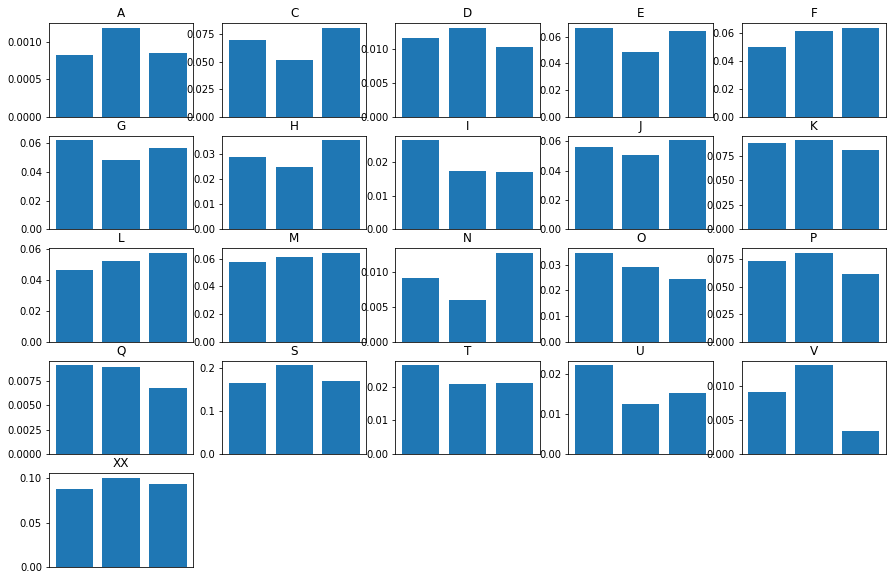

In [86]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter,etykiety, normalizacja=True)

## Test random init

In [24]:
wystapieniaLiter, bledneNazwy=zrobStatystykeWystapienGrupFunkcjonalnych(model, etykiety, szeregi, szeregiNazwy)

Liczba błędnych nazw: 387


In [25]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety)

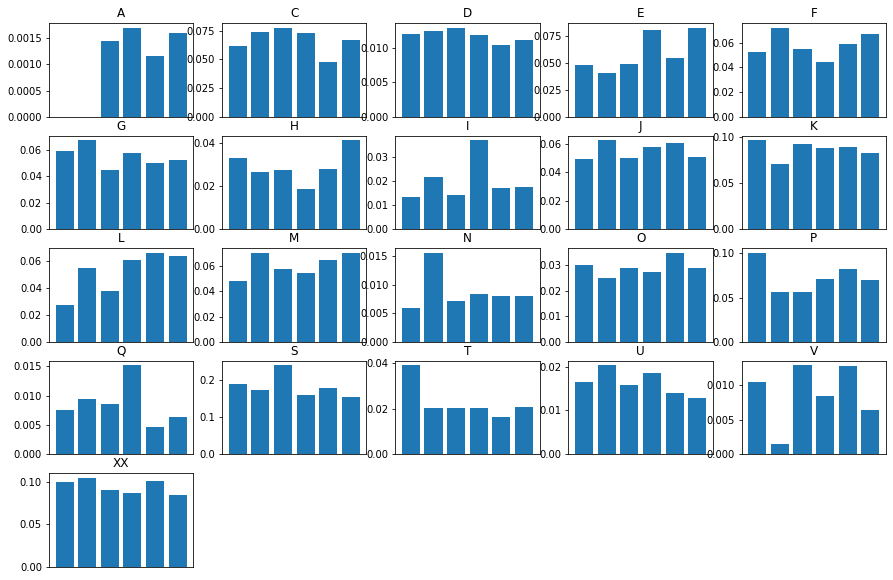

In [26]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety, True)